In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.30)

### Model Tahmin

In [3]:
gbm_model=GradientBoostingClassifier().fit(X_train,y_train)

In [4]:
?gbm_model

Type:        GradientBoostingClassifier
String form: GradientBoostingClassifier()
Length:      100
File:        c:\users\sevva\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for classification.

GB builds an additive model in a
forward stage-wise fashion; it allows for the optimization of
arbitrary differentiable loss functions. In each stage ``n_classes_``
regression trees are fit on the negative gradient of the
binomial or multinomial deviance loss function. Binary classification
is a special case where only a single regression tree is induced.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'deviance', 'exponential'}, default='deviance'
    The loss function to be optimized. 'deviance' refers to
    deviance (= logistic regression) for classification
    with probabilistic outputs. For loss 'exponential' gradient
    boosting recovers the AdaBoost algorithm.

learning_rate : float, default=0.1
    Learning r

In [5]:
y_pred=gbm_model.predict(X_test)

In [7]:
accuracy_score(y_test,y_pred)

0.7445887445887446

### Model Tuning

In [8]:
gbm=GradientBoostingClassifier()

In [9]:
gbm_params={"learning_rate":[0.1,0.01,0.001,0.5],"n_estimators":[100,300,1000],"max_depth":[3,5,8]}

In [10]:
gbm_cv_model=GridSearchCV(gbm,gbm_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


In [11]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}

In [13]:
gbm_tuned=GradientBoostingClassifier(learning_rate=0.01,max_depth=5,n_estimators=300).fit(X_train,y_train)

In [14]:
y_pred=gbm_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7402597402597403

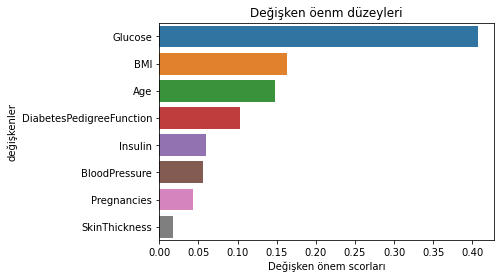

In [15]:
feature_imp=pd.Series(gbm_tuned.feature_importances_,index=X_train.columns).sort_values(ascending=False)

import seaborn as sns
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel("Değişken önem scorları")
plt.ylabel("değişkenler")
plt.title("Değişken öenm düzeyleri")
plt.show()